In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
apple = wb.DataReader('AAPL',data_source='yahoo', start='2015-1-1', end='2017-1-1')
apple.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.696352
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.000614
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.002876
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.339447
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.274624
2015-01-09,28.312500,27.552500,28.167500,28.002501,214798000.0,25.301731
2015-01-12,28.157499,27.200001,28.150000,27.312500,198603200.0,24.678280
2015-01-13,28.200001,27.227501,27.857500,27.555000,268367600.0,24.897392
2015-01-14,27.622499,27.125000,27.260000,27.450001,195826400.0,24.802519


In [4]:
apple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,29.129999,28.897499,28.897499,29.129999,56998000.0,27.364527
2016-12-27,29.450001,29.122499,29.129999,29.315001,73187600.0,27.538317
2016-12-28,29.504999,29.049999,29.379999,29.190001,83623600.0,27.420895
2016-12-29,29.277500,29.100000,29.112499,29.182501,60158000.0,27.413847
2016-12-30,29.299999,28.857500,29.162500,28.955000,122345200.0,27.200134


In [5]:
type(apple)

pandas.core.frame.DataFrame

Calculo tasa retorno

In [6]:
apple['Tasa de retorno'] =(apple['Adj Close']/apple['Adj Close'].shift(1)) -1
print(apple['Tasa de retorno'])

Date
2015-01-02         NaN
2015-01-05   -0.028172
2015-01-06    0.000094
2015-01-07    0.014022
2015-01-08    0.038422
                ...   
2016-12-23    0.001978
2016-12-27    0.006351
2016-12-28   -0.004264
2016-12-29   -0.000257
2016-12-30   -0.007796
Name: Tasa de retorno, Length: 504, dtype: float64


# Retorno de un portafolio

In [7]:
tickers=['MSFT','AMZN','TSLA','V','FB']
mydata=pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t,data_source='yahoo',start='01-01-2019')['Adj Close']
    
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2019-01-02 to 2020-12-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    494 non-null    float64
 1   AMZN    494 non-null    float64
 2   TSLA    494 non-null    float64
 3   V       494 non-null    float64
 4   FB      494 non-null    float64
dtypes: float64(5)
memory usage: 23.2 KB


In [8]:
mydata.head()

,MSFT,AMZN,TSLA,V,FB
2019-01-02,98.602066,1539.130005,62.023998,131.264542,135.679993
2019-01-03,94.974693,1500.280029,60.071999,126.534225,131.740005
2019-01-04,99.391899,1575.390015,63.537998,131.985474,137.949997
2019-01-07,99.518669,1629.510010,66.991997,134.365448,138.050003
2019-01-08,100.240234,1656.579956,67.070000,135.096252,142.529999


In [9]:
mydata.tail()

,MSFT,AMZN,TSLA,V,FB
2020-12-09,211.800003,3104.199951,604.479980,209.580002,277.920013
2020-12-10,210.520004,3101.489990,627.070007,207.610001,277.119995
2020-12-11,213.259995,3116.419922,609.989990,206.240005,273.549988
2020-12-14,214.199997,3156.969971,639.830017,207.250000,274.190002
2020-12-15,214.130005,3165.120117,633.250000,208.360001,275.549988


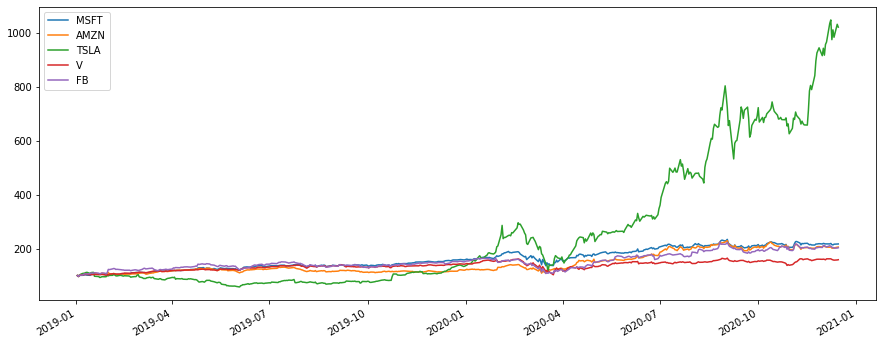

In [10]:
(mydata / mydata.iloc[0]*100).plot(figsize = (15,6));

In [11]:
returns=(mydata/mydata.shift(1)) -1
returns.head()

,MSFT,AMZN,TSLA,V,FB
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.036788,-0.025242,-0.031472,-0.036037,-0.029039
2019-01-04,0.046509,0.050064,0.057697,0.043081,0.047138
2019-01-07,0.001275,0.034353,0.054361,0.018032,0.000725
2019-01-08,0.007251,0.016612,0.001164,0.005439,0.032452


In [12]:
weights = np.array([0.20,0.20,0.20,0.20,0.20])
anual_returns = returns.mean()*250
np.dot(anual_returns,weights)

0.6062252321479382

In [13]:
pf1 = str(round(np.dot(anual_returns,weights),4)*100)+'%'
print(pf1)

60.62%


In [14]:
START_DATE='2009-01-01'
END_DATE='2019-12-31'
AMAZON='AMZN'

In [ ]:
def get_data(ticker):
    try:
        stock_data=